In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp

from itertools import cycle
import re

%matplotlib inline 
sns.set()


In [18]:
df = pd.read_csv("student_data.csv")
pd.options.display.max_columns = None
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df.shape

(395, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...
health,395.0,3.554430,1.390303,1.0,3.0,4.0,5.0,5.0
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0


In [7]:
#check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

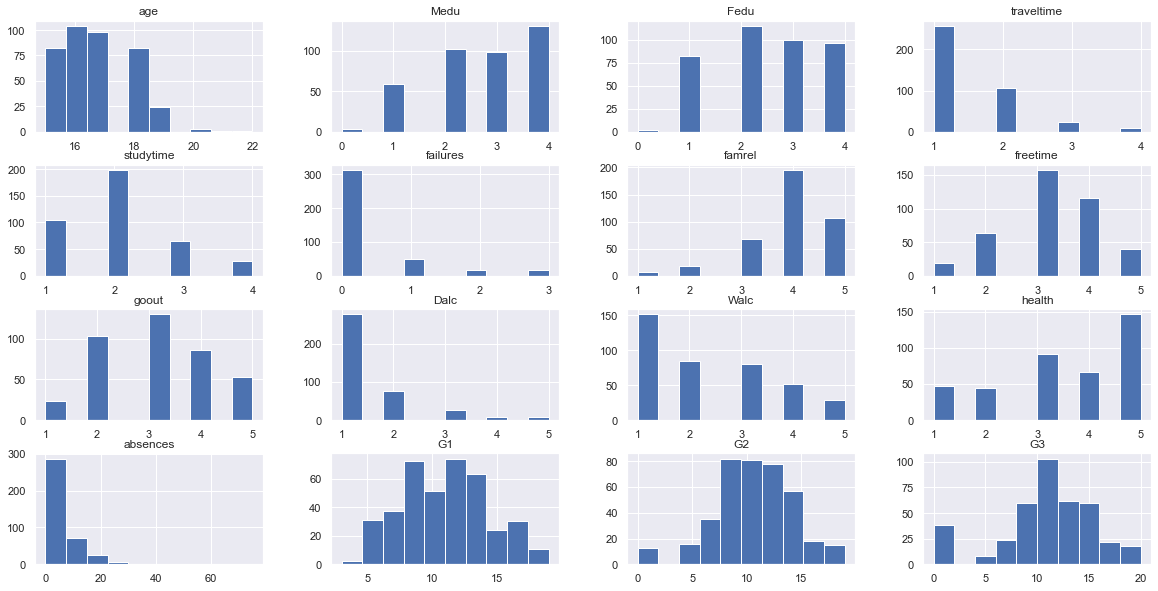

In [28]:
df.hist(figsize=(20,10))
plt.show()

In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

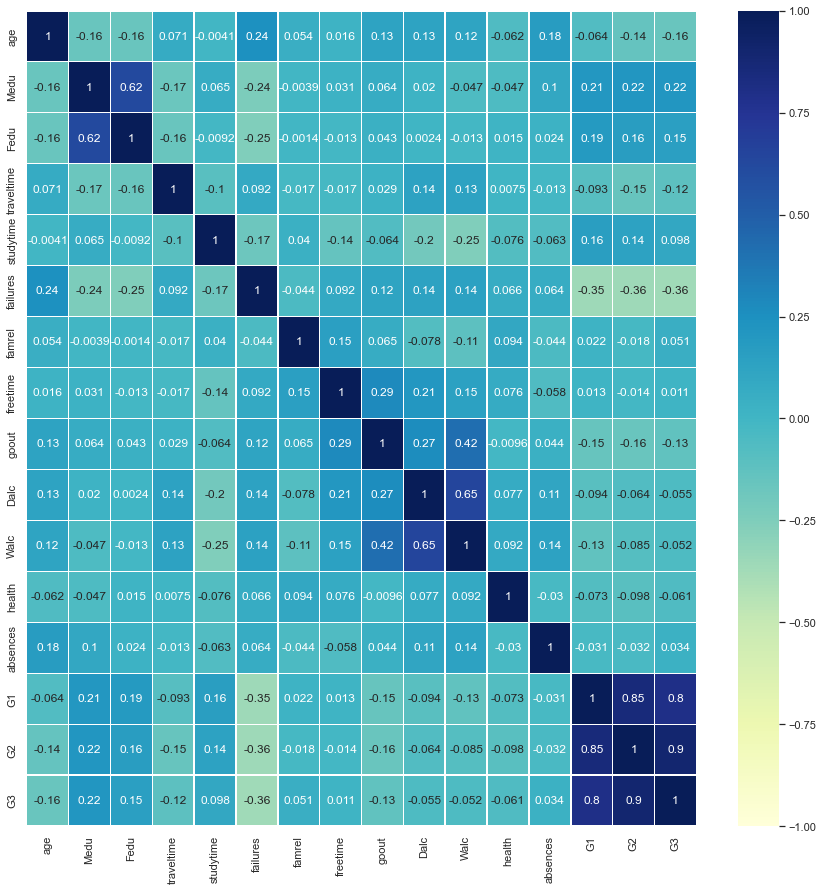

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), vmin=-1, cmap="YlGnBu", annot=True, linewidths=.5)



In [41]:
df[['Medu', 'Fedu', 'G1', 'G2', 'G3', 'Walc', 'studytime']].corr()

,Medu,Fedu,G1,G2,G3,Walc,studytime
Medu,1.000000,0.623455,0.205341,0.215527,0.217147,-0.047123,0.064944
Fedu,0.623455,1.000000,0.190270,0.164893,0.152457,-0.012631,-0.009175
G1,0.205341,0.190270,1.000000,0.852118,0.801468,-0.126179,0.160612
G2,0.215527,0.164893,0.852118,1.000000,0.904868,-0.084927,0.135880
G3,0.217147,0.152457,0.801468,0.904868,1.000000,-0.051939,0.097820
Walc,-0.047123,-0.012631,-0.126179,-0.084927,-0.051939,1.000000,-0.253785
studytime,0.064944,-0.009175,0.160612,0.135880,0.097820,-0.253785,1.000000


(0.0, 21.0)

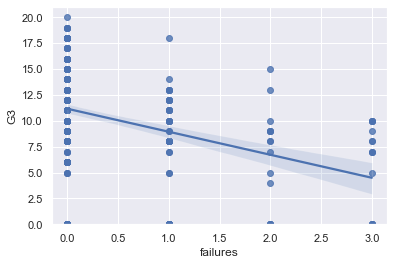

In [35]:
sns.regplot(x="failures", y="G3", data=df)
plt.ylim(0,)

Text(0.5, 1.0, 'Sex vs Walc')

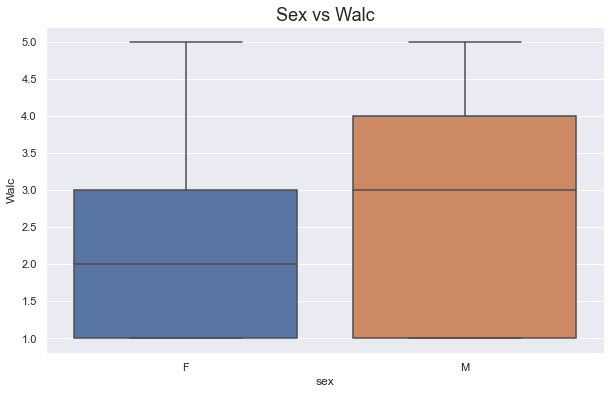

In [32]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='sex',y='Walc',data=df)
plt.title('Sex vs Walc',size=18)

Text(0.5, 1.0, 'Internet vs Final Grage')

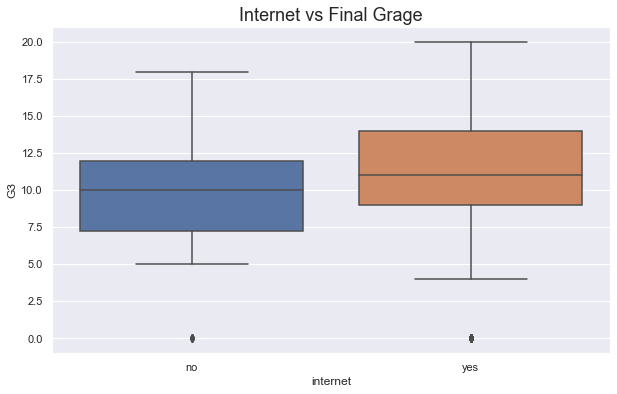

In [38]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='internet',y='G3',data=df)
plt.title('Internet vs Final Grage',size=18)


<b>Distribution of Students Features</b>

In [48]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=3, 
    cols=3,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Age of students",
        "Education of Mother (Medu)",
        "Education of Father (Fedu)",
        "Travel time",
        "Free time",
        "Absences",
        "Sex",
        "Type of school",
        "Internet"],
        specs=[[{"type": "histogram"}, {"type": "histogram"}, {"type": "histogram"}],
           [{"type": "histogram"}, {"type": "histogram"}, {"type": "histogram"}],
           [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
        vertical_spacing = 0.1
)

age = go.Histogram(
    x=df.age,
    name="Age",
    marker_color=next(palette),
    legendgroup="Age",
    legendgrouptitle_text="Age",
    
)

medu = go.Histogram(
    x=df.Medu,
    name="Medu",
    marker_color=next(palette),
    legendgroup="Medu",
    legendgrouptitle_text="Medu",
)

fedu = go.Histogram(
    x=df.Fedu,
    name="Fedu",
    marker_color=next(palette),
    legendgroup="Fedu",
    legendgrouptitle_text="Fedu",
)

traveltime = go.Histogram(
    x=df.traveltime,
    name="Traveltime",
    marker_color=next(palette),
    legendgroup="Traveltime",
    legendgrouptitle_text="Traveltime",
)

freetime = go.Histogram(
    x=df.freetime,
    name="Freetime",
    marker_color=next(palette),
    legendgroup="Freetime",
    legendgrouptitle_text="Freetime",
)

absences = go.Histogram(
    x=df.absences,
    name="Absences",
    marker_color=next(palette),
    legendgroup="Absences",
    legendgrouptitle_text="Absences",
)

sex_counts = df.sex.value_counts()

sex = go.Pie(
    labels=sex_counts.index,
    values=sex_counts,
    name="Sex",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(sex_counts))],
    legendgroup="Sex",
    legendgrouptitle_text="Sex",
)

school_counts = df.school.value_counts()

school = go.Pie(
    labels=school_counts.index,
    values=school_counts,
    name="School",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(sex_counts))],
    legendgroup="School",
    legendgrouptitle_text="School",
)

internet_counts = df.internet.value_counts()

internet = go.Pie(
    labels=internet_counts.index,
    values=internet_counts,
    name="Internet",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(sex_counts))],
    legendgroup="Internet",
    legendgrouptitle_text="Internet",
)

fig.add_trace(age, row=1, col=1)
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.add_trace(medu, row=1, col=2)
fig.update_xaxes(title_text="Medu", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.add_trace(fedu, row=1, col=3)
fig.update_xaxes(title_text="Fedu", row=1, col=3)
fig.update_yaxes(title_text="Count", row=1, col=3)

fig.add_trace(traveltime, row=2, col=1)
fig.update_xaxes(title_text="Traveltime", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)

fig.add_trace(freetime, row=2, col=2)
fig.update_xaxes(title_text="Freetime", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)

fig.add_trace(absences, row=2, col=3)
fig.update_xaxes(title_text="Absences", row=2, col=3)
fig.update_yaxes(title_text="Count", row=3, col=3)

fig.add_trace(sex, row=3, col=1)
fig.update_xaxes(title_text="Sex", row=3, col=1)
fig.update_yaxes(title_text="Count", row=3, col=1)

fig.add_trace(school, row=3, col=2)
fig.update_xaxes(title_text="School", row=3, col=2)
fig.update_yaxes(title_text="Count", row=3, col=2)

fig.add_trace(internet, row=3, col=3)
fig.update_xaxes(title_text="Internet", row=3, col=3)
fig.update_yaxes(title_text="Count", row=3, col=3)

fig.update_layout(
    template="plotly",
    height=1400,
)

fig.update(
    layout_title_text="Distribution of Students Characteristics",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

In [52]:
df['avg'] = round((df.G1 + df.G2 + df.G3)/3)
df.head(1)



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,6.0



 <B>Distribution of Students grades </B>


In [54]:
fig = sp.make_subplots(
    rows=4, 
    cols=2,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Medu",
        "Fedu",
        "Travel time",
        "Study time",
        "School",
        "Failure",
        "Sex",
        "Go out",],
        vertical_spacing = 0.1
)

g1_box = go.Box(
    x = df.Medu,
    y=df.avg,
    name="Medu",
    legendgroup="Medu",
    legendgrouptitle_text="Medu",
    marker_color=next(palette),
)

g2_box = go.Box(
    x = df.Fedu,
    y=df.avg,
    name="Fedu",
    legendgroup="Fedu",
    legendgrouptitle_text="Fedu",
    marker_color=next(palette),
)

g3_box = go.Box(
    x = df.traveltime,
    y=df.avg,
    name="Travel time",
    legendgroup="Travel time",
    legendgrouptitle_text="Travel time",
    marker_color=next(palette),
)

gavg_box = go.Box(
    x = df.studytime,
    y=df.avg,
    name="Study time",
    legendgroup="Study time",
    legendgrouptitle_text="Study time",
    marker_color=next(palette),
)

age_box = go.Box(
    x = df.school,
    y=df.avg,
    name="School",
    legendgroup="School",
    legendgrouptitle_text="School",
    marker_color=next(palette),
)

fail_box = go.Box(
    x = df.failures,
    y=df.avg,
    name="Failure",
    legendgroup="Failure",
    legendgrouptitle_text="Failure",
    marker_color=next(palette),
)

sex_box = go.Box(
    x = df.sex,
    y=df.avg,
    name="Sex",
    legendgroup="Sex",
    legendgrouptitle_text="Sex",
    marker_color=next(palette),
)

go_box = go.Box(
    x = df.goout,
    y=df.avg,
    name="Go out",
    legendgroup="Go out",
    legendgrouptitle_text="Go out",
    marker_color=next(palette),
)

fig.add_trace(g1_box, row=1, col=1)
fig.update_xaxes(title_text="Medu", row=1, col=1)
fig.update_yaxes(title_text="Average grade", row=1, col=1)

fig.add_trace(g2_box, row=1, col=2)
fig.update_xaxes(title_text="Fedu", row=1, col=2)
fig.update_yaxes(title_text="Average grade", row=1, col=2)

fig.add_trace(g3_box, row=2, col=1)
fig.update_xaxes(title_text="Travel time", row=2, col=1)
fig.update_yaxes(title_text="Average grade", row=2, col=1)

fig.add_trace(gavg_box, row=2, col=2)
fig.update_xaxes(title_text="Study time", row=2, col=2)
fig.update_yaxes(title_text="Average grade", row=2, col=2)

fig.add_trace(age_box, row=3, col=1)
fig.update_xaxes(title_text="School", row=3, col=1)
fig.update_yaxes(title_text="Average grade", row=3, col=1)

fig.add_trace(fail_box, row=3, col=2)
fig.update_xaxes(title_text="Failure", row=3, col=2)
fig.update_yaxes(title_text="Count", row=3, col=2)

fig.add_trace(sex_box, row=4, col=1)
fig.update_xaxes(title_text="Sex", row=4, col=1)
fig.update_yaxes(title_text="Average grade", row=4, col=1)

fig.add_trace(go_box, row=4, col=2)
fig.update_xaxes(title_text="Go out", row=4, col=2)
fig.update_yaxes(title_text="Average grade", row=4, col=2)

fig.update_layout(
    template="plotly",
    height=1000,
)

fig.update(
    layout_title_text="Box Plots of Student's Characteristics",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()




<b>Parent's job</b>

In [56]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=1, 
    cols=2,
    horizontal_spacing=0.08,
    subplot_titles=["Father","Mother"],
    specs=[[{"type": "pie"}, {"type": "pie"}, ]],
    vertical_spacing = 0.1
)


fjob_counts = df.Fjob.value_counts()

fjob = go.Pie(
    labels=fjob_counts.index,
    values=fjob_counts,
    name="Father",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(fjob_counts))],
    legendgroup="Father",
    legendgrouptitle_text="Father",
)

mjob_counts = df.Mjob.value_counts()

mjob = go.Pie(
    labels=mjob_counts.index,
    values=mjob_counts,
    name="Mother",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(fjob_counts))],
    legendgroup="Mother",
    legendgrouptitle_text="Mother",
)

fig.add_trace(fjob, row=1, col=1)
fig.update_xaxes(title_text="Father", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.add_trace(mjob, row=1, col=2)
fig.update_xaxes(title_text="Mother", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)


fig.update_layout(
    template="plotly",
    height=500,
)

fig.update(
    layout_title_text="Parent's job",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

<b>Parent's job and students average grade</b>

In [58]:
fig = sp.make_subplots(
    rows=1, 
    cols=2,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Father",
        "Mother",],
        vertical_spacing = 0.1
)

g1_box = go.Box(
    x = df.Fjob,
    y=df.avg,
    name="Father",
    legendgroup="Father",
    legendgrouptitle_text="Father",
    marker_color=next(palette),
)

g2_box = go.Box(
    x = df.Mjob,
    y=df.avg,
    name="Mother",
    legendgroup="Mother",
    legendgrouptitle_text="Mother",
    marker_color=next(palette),
)


fig.add_trace(g1_box, row=1, col=1)
fig.update_xaxes(title_text="Father", row=1, col=1)
fig.update_yaxes(title_text="Avg grade", row=1, col=1)

fig.add_trace(g2_box, row=1, col=2)
fig.update_xaxes(title_text="Mother", row=1, col=2)
fig.update_yaxes(title_text="Avg grade", row=1, col=2)



fig.update_layout(
    template="plotly",
    height=500,
)

fig.update(
    layout_title_text="Parent's job and students average grade",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()
